Problem 1 code

#a

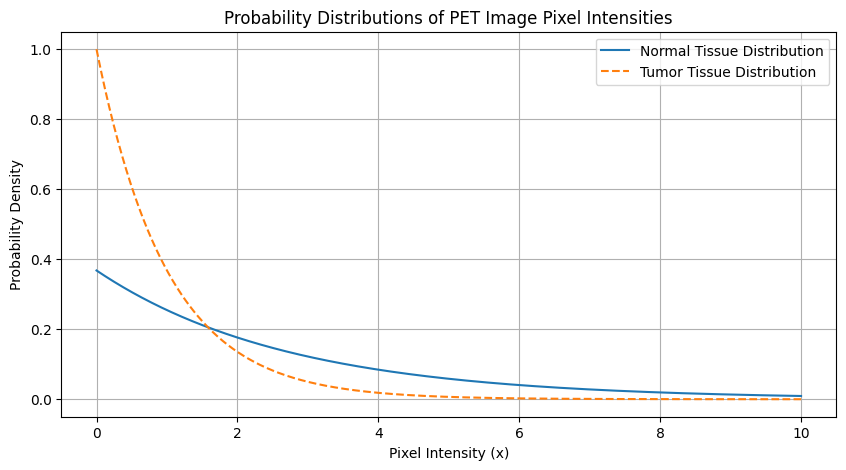

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters for the exponential distributions
beta_n = np.e  # approximately 2.718
beta_t = 1.0   # given as 1

# Define the exponential probability density functions
def p_x_given_normal(x):
    return (1 / beta_n) * np.exp(-x / beta_n) if x >= 0 else 0

def p_x_given_tumor(x):
    return (1 / beta_t) * np.exp(-x / beta_t) if x >= 0 else 0

# Generate a range of x values from 0 to 10 with small increments
x_values = np.linspace(0, 10, 1000)

# Calculate the probability densities for each class
p_normal = np.array([p_x_given_normal(x) for x in x_values])
p_tumor = np.array([p_x_given_tumor(x) for x in x_values])

# Plot the distributions
plt.figure(figsize=(10, 5))
plt.plot(x_values, p_normal, label='Normal Tissue Distribution')
plt.plot(x_values, p_tumor, label='Tumor Tissue Distribution', linestyle='--')
plt.title('Probability Distributions of PET Image Pixel Intensities')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#b

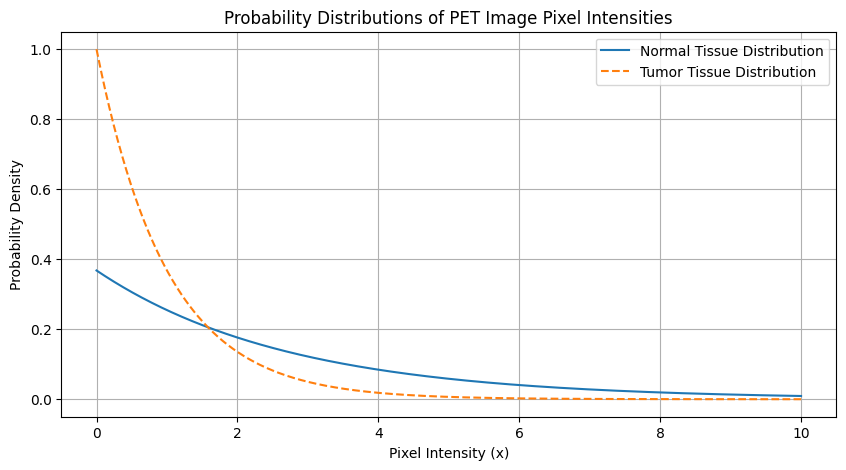

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters for the exponential distributions
beta_n = np.e  # approximately 2.718
beta_t = 1.0   # given as 1

# Define the exponential probability density functions
def p_x_given_normal(x):
    return (1 / beta_n) * np.exp(-x / beta_n) if x >= 0 else 0

def p_x_given_tumor(x):
    return (1 / beta_t) * np.exp(-x / beta_t) if x >= 0 else 0

# Generate a range of x values from 0 to 10 with small increments
x_values = np.linspace(0, 10, 1000)

# Calculate the probability densities for each class
p_normal = np.array([p_x_given_normal(x) for x in x_values])
p_tumor = np.array([p_x_given_tumor(x) for x in x_values])

# Plot the distributions
plt.figure(figsize=(10, 5))
plt.plot(x_values, p_normal, label='Normal Tissue Distribution')
plt.plot(x_values, p_tumor, label='Tumor Tissue Distribution', linestyle='--')
plt.title('Probability Distributions of PET Image Pixel Intensities')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#c

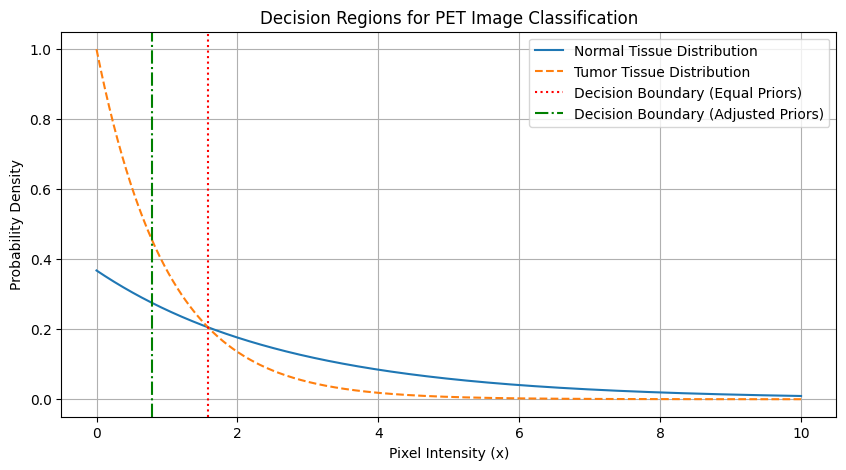

(None, 0.7909883534346632, array([1.58158158]))

In [20]:
# b. Assuming the prior probabilities of the classes to be the same, determine the minimum error classification rule.
# Plot the decision regions. The decision boundary occurs where the two probabilities intersect.

# Since the priors are assumed to be equal, the decision boundary is where the likelihoods are equal.
# Find the intersection point of the two distributions
intersection_x = np.argwhere(np.diff(np.sign(p_normal - p_tumor))).flatten()

# c. Assume that the prior probability of normal tissue to be e^1/2 ≈ 1.64 times that of the tumor tissue.
# Determine the minimum error classification rule with this assumption.
prior_normal = np.e ** (1 / 2)
prior_tumor = 1
# The decision boundary now shifts according to the ratio of the priors
# p(x|normal) * prior_normal = p(x|tumor) * prior_tumor
# Since the distributions are exponential, this simplifies to:
# (1/beta_n) * exp(-x/beta_n) * prior_normal = (1/beta_t) * exp(-x/beta_t) * prior_tumor
# Taking the log of both sides to simplify
# (-x/beta_n) + log(prior_normal/beta_n) = (-x/beta_t) + log(prior_tumor/beta_t)
# Solving for x gives us the decision boundary
decision_boundary_adjusted = np.log(prior_normal / prior_tumor) / (1 / beta_t - 1 / beta_n)

# Plot the decision regions
plt.figure(figsize=(10, 5))

# Plot the distributions again for reference
plt.plot(x_values, p_normal, label='Normal Tissue Distribution')
plt.plot(x_values, p_tumor, label='Tumor Tissue Distribution', linestyle='--')

# Add vertical lines for decision boundaries
plt.axvline(x=x_values[intersection_x], color='red', linestyle=':', label='Decision Boundary (Equal Priors)')
plt.axvline(x=decision_boundary_adjusted, color='green', linestyle='-.', label='Decision Boundary (Adjusted Priors)')

plt.title('Decision Regions for PET Image Classification')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show(), decision_boundary_adjusted, x_values[intersection_x]


#d

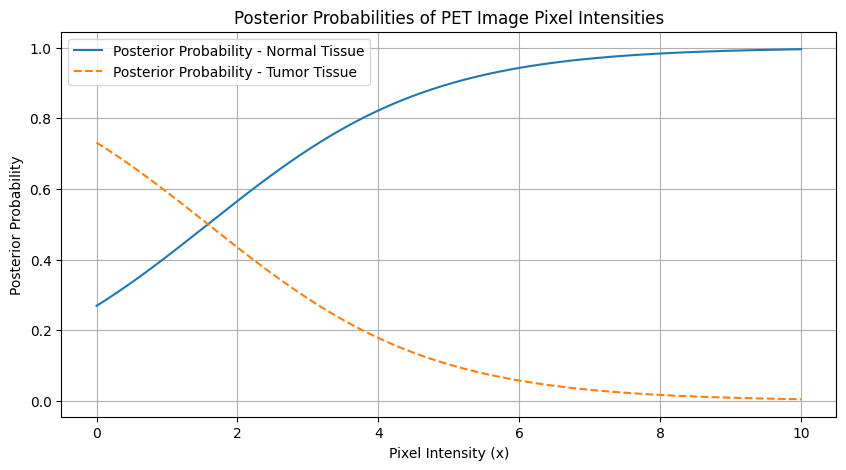

In [21]:
# Part d: Determine and plot the posterior probabilities of the classes with equal priors.
# Bayes' Theorem: P(Class|X) = (P(X|Class) * P(Class)) / P(X)
# For equal priors: P(Class) is the same for both classes, so it cancels out when comparing posteriors.

# Total probability P(X) is the sum of the likelihoods weighted by their priors
# Since the priors are equal and not specified, we can assume them to be 1 for the sake of plotting posteriors
# P(X) = P(X|Normal) * P(Normal) + P(X|Tumor) * P(Tumor)
# As the priors are equal, they cancel out in the division for the Bayes' theorem application

p_x = p_normal + p_tumor  # Total probability of X
posterior_normal = p_normal / p_x  # Posterior for normal tissue
posterior_tumor = p_tumor / p_x  # Posterior for tumor tissue

# Plot the posterior probabilities
plt.figure(figsize=(10, 5))
plt.plot(x_values, posterior_normal, label='Posterior Probability - Normal Tissue')
plt.plot(x_values, posterior_tumor, label='Posterior Probability - Tumor Tissue', linestyle='--')
plt.title('Posterior Probabilities of PET Image Pixel Intensities')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Posterior Probability')
plt.legend()
plt.grid(True)
plt.show()


#e

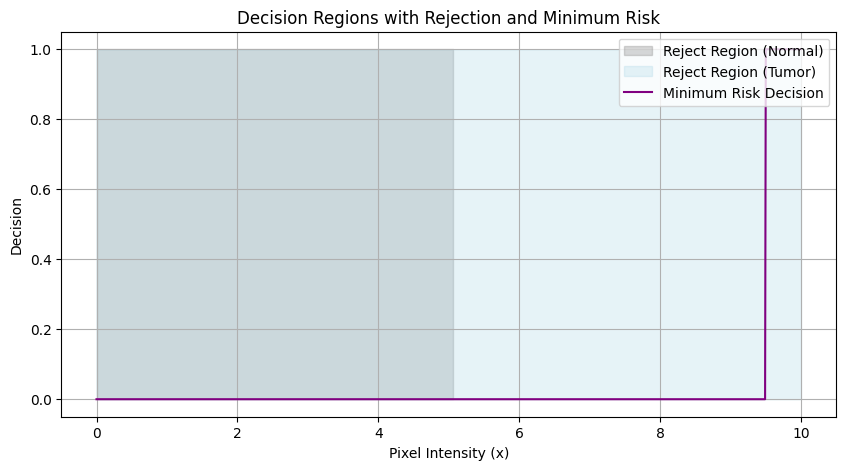

In [22]:
# e. The mis-classification error can be reduced by rejecting regions with posterior probabilities less than 90%.
# Determine and plot the decision regions with this setting.

# Decision regions where the posterior probability of the correct class is less than 90%
reject_region_normal = posterior_normal < 0.9
reject_region_tumor = posterior_tumor < 0.9

# f. Physicians assess the risk in mis-classifying a normal pixel as tumor to be $1, while the risk
# in misclassifying a tumor pixel as normal to be $148.41 ≈ e^5, where e ≈ 2.718.
# With the above information, determine and plot the minimum risk classification decision regions.
# The risk can be considered as the cost-weighted sum of posterior probabilities.

# Costs associated with misclassification
cost_false_negative = np.e ** 5  # cost of misclassifying a tumor as normal
cost_false_positive = 1          # cost of misclassifying normal as tumor

# The minimum risk decision rule is where the expected risk is minimized.
# Expected risk for classifying as normal tissue = posterior_tumor * cost_false_negative
# Expected risk for classifying as tumor tissue = posterior_normal * cost_false_positive
risk_normal = posterior_tumor * cost_false_negative
risk_tumor = posterior_normal * cost_false_positive

# The decision is to choose the class with the lower expected risk
decision_risk = risk_normal < risk_tumor

# Plot the decision regions with rejection and minimum risk
plt.figure(figsize=(10, 5))

# Plot the regions to reject
plt.fill_between(x_values, 0, 1, where=reject_region_normal, color='gray', alpha=0.3, label='Reject Region (Normal)')
plt.fill_between(x_values, 0, 1, where=reject_region_tumor, color='lightblue', alpha=0.3, label='Reject Region (Tumor)')

# Plot the minimum risk decision regions
plt.plot(x_values, decision_risk, label='Minimum Risk Decision', color='purple')

plt.title('Decision Regions with Rejection and Minimum Risk')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Decision')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#f

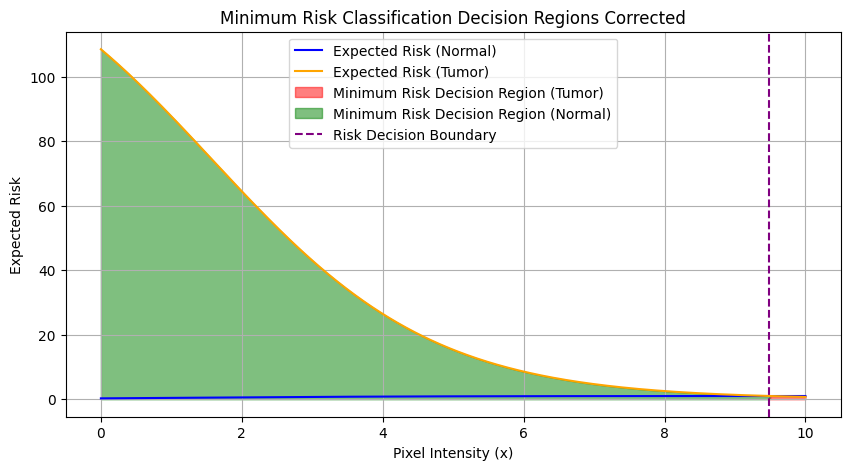

In [24]:
# f. Considering the costs of misclassification, we will calculate the expected risk for each classification decision
# and plot the decision boundary based on the minimum expected risk.

# Calculate the expected risks
expected_risk_normal = posterior_normal * cost_false_positive
expected_risk_tumor = posterior_tumor * cost_false_negative

# Decision rule for minimum risk: classify as tumor if the expected risk of classifying as normal is greater
# than the expected risk of classifying as tumor.
minimum_risk_decision = expected_risk_normal > expected_risk_tumor

# Find the intersection point where the two risks are equal
risk_intersection = np.argwhere(np.diff(np.sign(expected_risk_normal - expected_risk_tumor))).flatten()

# Plot the decision regions considering the risks
plt.figure(figsize=(10, 5))

# Plot the expected risks again for reference
plt.plot(x_values, expected_risk_normal, label='Expected Risk (Normal)', color='blue')
plt.plot(x_values, expected_risk_tumor, label='Expected Risk (Tumor)', color='orange')

# Highlight the decision region where expected risk for tumor is lower
plt.fill_between(x_values, 0, expected_risk_normal, where=(x_values > x_values[risk_intersection]), color='red', alpha=0.5, label='Minimum Risk Decision Region (Tumor)')
plt.fill_between(x_values, 0, expected_risk_tumor, where=(x_values <= x_values[risk_intersection]), color='green', alpha=0.5, label='Minimum Risk Decision Region (Normal)')

# Add vertical line for decision boundary
plt.axvline(x=x_values[risk_intersection], color='purple', linestyle='--', label='Risk Decision Boundary')

plt.title('Minimum Risk Classification Decision Regions Corrected')
plt.xlabel('Pixel Intensity (x)')
plt.ylabel('Expected Risk')
plt.legend()
plt.grid(True)
plt.show()
